*Sumary*
# Bike riding speedy success trough data
*A data analysis for [Divvy Bikes](https://divvybikes.com/), a bike-share company in Chicago, who wants to increase its customer generated revenue maximizing the number of annual memberships*  


In this study, we will perform an analysis of data provided by Divvy in order to **help them on their data driven efforts to attract more anual members riders.** 

This is part of the work to conclude the [Google Data Analytics Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) as a Case Study.  The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement)

You can find more details about the company and its data at: https://divvybikes.com/system-data



### **Study Goals and Objective**

The guiding questions for this study were provided by the company 

Divvy’s finance analysts have concluded that annual members are much more profitable than casual riders, and the company believes that maximizing the number of annual members and intend creating a marketing campaign to convert casual riders into members. In order to support the marketing team on the set up of this marketing campaign, the chalenge of this analysis will be answering the following questions:

**1. How do annual members and casual riders use Divvy bikes differently?**

**2. Why would casual riders buy Divvy annual memberships?**

**3. How can Divvy use digital media to influence casual riders to become members?**

### **Tools and Methodology**

The methodology used follows the Google approach to working with data, including the steps to prepare, clean, analyse, share (report) and action.

To clean, manipulate and exploit the databases, the following tools were used:  
   -   [Google Colaboratory ](https://colab.research.google.com/) Plataform 
   -   Phyton Programing Language
   -   Libraries: Pandas, Numpy, Matplotlib, Seaborn, Geopy and others
   -   Microsoft Excel

.

For sharing the results and ploting the findings (reports, dashboards e presentations), I used:
   -   [Tableau Public](https://public.tableau.com/app/about ) 
   -   Google Presentations


*About the data*
#### Metadata

As mentioned before, the data has been made available by Motivate International Inc. under the [data license agreement](https://ride.divvybikes.com/data-license-agreement)

02 types of databases were provided: 

**Monthly Trips Data**:
 * from jan, 2022 to feb, 2023
 * 14 files, named under this protocol: Divvy_Trips_[YYYY]_[Q]

  * *variables*
    * trip_id: ID attached to each trip taken
    * start_time: day and time trip started, in CST
    * stop_time: day and time trip ended, in CST
    * bikeid: ID attached to each bike
    * from_station_name: name of station where trip originated
    * to_station_name: name of station where trip terminated 
    * from_station_id: ID of station where trip originated
    * to_station_id: ID of station where trip terminated
    * usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

**Stations Data**:
  * 2013 to 2014
  * 6 files, named under this protocol: Divvy_Stations_Trips_[YYYY]_[Quarter]
 
  * *variables* 
    * id: ID attached to each station
    * name: station name    
    * latitude: station latitude
    * longitude: station longitude
    * dpcapacity: number of total docks at each station as of 12/31/2017
    * online_date: date the station was created in the system

### **The Code**  
*Finally, Let's code!*

In [194]:
#loading the libraries
import pandas as pd
import numpy as np
import os
from pandas.core.base import value_counts
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive

For **TRIP DATA**, we are going to use all files from 2022 to 2023.

As for **STATION DATA**, we shall only use the most recent one, as it contains the most updated information about the  capacity and number of stations available.

Also, as you will see below, all the files I got from Divvy were saved in the same folder and, besides the usefull data files, the folder contains also some metadata archives as 'readme_files', 'zip files', 'MACOSX' and others sub-folders inside the same directory.

In [195]:
drive.mount('/content/drive')
data_files = os.listdir('/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data')
display (data_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv',
 '202210-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv',
 '202301-divvy-tripdata.csv',
 '202302-divvy-tripdata.csv',
 'readme_files',
 '__MACOSX',
 'historical',
 'zip files',
 'Divvy_Stations_2017_Q3Q4.csv',
 'Divvy_Stations_2017_Q1Q2.csv',
 'Divvy_Stations_2016_Q4.csv',
 'Divvy_Stations_2016_Q3.csv',
 'Divvy_Stations_2016_Q1Q2.csv',
 'Divvy_Stations_2014-Q3Q4.csv',
 'Divvy_Stations_2015.csv',
 'Divvy_Stations_2013.csv']

I am going to use the defined files standard naming protocol to filter and load only the files I want to use.

In [196]:
# selecting and loading the TRIP DATA informations
for file in data_files:
    # if the file name contains "tripdata" or "Tripdata"
    if "tripdata" in file.lower():
    
    #then print each file name and format including the whole file address (just to confirm its what we need)
        print(f"/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/{file}")

/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202201-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202202-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202203-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202204-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202205-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202206-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202207-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202208-divvy-tripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202209-divvy-publictripdata.csv
/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/202210-divvy-tripdat

Now, we are going to create a dataframe use the same loop resource to load all the databases in this one unique dataframe

In [197]:
# creating the dataframe
base1 = pd.DataFrame()
        
for file in data_files:
    # if the file name contains "tripdata" or "Tripdata"
    if "tripdata" in file.lower():
    
    #then load each file
        base0 = pd.read_csv(f"/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/{file}")
    
    # and append all in one unique dataframe we just created
        base1 = pd.concat([base1, base0])

In [198]:
display(base1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190440,C04510F8EBB5EE8A,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,TA1305000014,Sheffield Ave & Waveland Ave,TA1307000126,41.929546,-87.643118,41.949399,-87.654529,member
190441,187BA364FB265C80,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,KA1504000101,Delano Ct & Roosevelt Rd,KA1706005007,41.866500,-87.684476,41.867491,-87.632190,member
190442,46B54F6B417D1B27,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929528,-87.643254,41.882409,-87.639767,casual
190443,335B3CAD59F6C016,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929611,-87.643118,41.882409,-87.639767,casual


**Loading the Bike Stations Data**

Remembering that we are only going to use the most recent one (2017-Q4), as it contains the most updated information about the number and capacity of the stations available.

In [199]:
stations = pd.read_csv("/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/raw_data/Divvy_Stations_2017_Q3Q4.csv")
display (stations)

,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18,NaN
...,...,...,...,...,...,...,...,...
580,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,15,4/27/2017 9:17,NaN
581,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,31,6/13/2017 15:23,NaN
582,624,Dearborn St & Van Buren St (*),Chicago,41.876268,-87.629155,16,7/26/2017 21:25,NaN
583,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,15,8/11/2017 16:53,NaN


*Note: When cleaning the data, exclude this empty column on "stations"*

### **Databases Diagnostic Evaluation**

Lets explore the data we got to evaluate what kind of possible pitfalls we have and guarantee that, after cleaning, the data we are working with is **Accurate, Complete and Consistent**

In [200]:
print ('''The analized timeframe includes:
        FROM: ''',base1['started_at'].min(),'''
        TO: ''', base1['started_at'].max())

The analized timeframe includes:
        FROM:  2022-01-01 00:00:05 
        TO:  2023-02-28 23:59:31


In [201]:
base1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [202]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048463 entries, 0 to 190444
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 646.0+ MB


####**Investigate / Correct** :
1) change the Dtypes of the following Atributes:
 * **rideable_type**       change Dtype to **Category**
 * **started_at**          change Dtype to **datetime64**
 * **ended_at**            change Dtype to **datetime64** 
 * **member_casual**       change Dtype to **Category**

looking for Missing data (NULL or NaN Values)


In [203]:
base1.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    885258
start_station_id      885390
end_station_name      947320
end_station_id        947461
start_lat                  0
start_lng                  0
end_lat                 6101
end_lng                 6101
member_casual              0
dtype: int64

In [204]:
base1.isna().mean() * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.636082
start_station_id      14.638264
end_station_name      15.662161
end_station_id        15.664492
start_lat              0.000000
start_lng              0.000000
end_lat                0.100869
end_lng                0.100869
member_casual          0.000000
dtype: float64

Approximately 15% of station information is missing. Lets find out which rides have missing values


In [205]:
missing_data = base1[base1.isna().any(axis=1)]
display (missing_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.930000,-87.760000,41.930000,-87.760000,casual
510,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,NaN,41.897632,-87.643388,41.900000,-87.640000,member
512,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,NaN,41.890000,-87.720000,41.900000,-87.710000,member
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.950000,-87.650000,41.950687,-87.668700,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.920000,-87.690000,41.950687,-87.668700,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189377,EEDE22944BA7AE21,electric_bike,2023-02-02 18:18:10,2023-02-02 18:31:03,NaN,NaN,Throop St & Taylor St,13139,41.870000,-87.650000,41.868968,-87.659141,member
189378,8830CFB87805860F,electric_bike,2023-02-21 12:12:06,2023-02-21 12:15:33,NaN,NaN,Throop St & Taylor St,13139,41.870000,-87.650000,41.868968,-87.659141,member
189446,7D4A141FBDB8B05B,classic_bike,2023-02-28 10:07:32,2023-02-28 10:20:26,Elizabeth St & Randolph St,NaN,Dearborn St & Monroe St,TA1305000006,41.880000,-87.660000,41.881320,-87.629521,member
189461,CB29BC7690EAA996,classic_bike,2023-02-17 13:59:12,2023-02-17 14:38:49,Elizabeth St & Randolph St,NaN,Michigan Ave & Washington St,13001,41.880000,-87.660000,41.883984,-87.624684,casual


In [206]:
share_missing_data = (len(missing_data)/len(base1)*100)

In [207]:
print('''There are 1,381,259  rows missing at least some information. 
         That's about {:.1f}% of the total number of rows / observations.'''.format(share_missing_data))


There are 1,381,259  rows missing at least some information. 
         That's about 22.8% of the total number of rows / observations.


####**Investigate / Correct** :

2) fill or exclude empty values at Atributes 'end_station_name', 'end_station_id', 'end_lat', 'end_lng'

**looking for Invalid, Duplicated or redundant Values**

In [208]:
base1.duplicated().sum()

0

There is no duplicated rows on the database. Good!!

Now, Let's take a look at the trips lengths, **in minutes**

For that, we will subtract the time of arrival from the time of departure.

In [209]:
base1['trip_length'] = (pd.to_datetime(base1['ended_at']) - pd.to_datetime(base1['started_at'])) / pd.Timedelta(1, unit='m')
display (base1['trip_length'])

0          2.950000
1          4.350000
2          4.350000
3         14.933333
4          6.033333
            ...    
190440    10.733333
190441    10.033333
190442    15.333333
190443    16.816667
190444    12.000000
Name: trip_length, Length: 6048463, dtype: float64

In [210]:
base1['trip_length'].describe()

count    6.048463e+06
mean     1.905449e+01
std      1.739035e+02
min     -1.035335e+04
25%      5.683333e+00
50%      1.005000e+01
75%      1.806667e+01
max      4.138725e+04
Name: trip_length, dtype: float64

It seems that we have negative length.. what does not make any sense. 

let's investigate deeper here, and take the opportunities to evaluate the existence of very short trips (less than 2 mins).

Any trip shorter than 2 mins in length are potentially false starts or users trying to re-dock a bike to ensure it was secure. They shall, therefore, be excluded. 


In [211]:
display((base1.loc[base1['trip_length'] < 2]).sort_values(by= 'trip_length', ascending=True))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length
417795,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,NaN,NaN,41.780576,-87.585171,41.780000,-87.590000,member,-10353.350000
154251,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.932418,-87.652705,41.932418,-87.652705,member,-168.700000
585672,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,NaN,NaN,NaN,NaN,41.930000,-87.790000,41.930000,-87.790000,casual,-137.416667
126109,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,-130.033333
301277,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.917831,-87.653363,41.920000,-87.650000,member,-129.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65554,163A11B0859A20C7,electric_bike,2023-01-11 15:33:29,2023-01-11 15:35:28,Dearborn St & Monroe St,TA1305000006,LaSalle St & Jackson Blvd,TA1309000004,41.880933,-87.629561,41.878166,-87.631929,member,1.983333
387046,01FD37BE43CC39AC,electric_bike,2022-09-12 14:09:49,2022-09-12 14:11:48,Wood St & Webster Ave,TA1307000138,Wood St & Webster Ave,TA1307000138,41.921013,-87.672850,41.921057,-87.672797,casual,1.983333
284995,0FE53A2643C60B8E,classic_bike,2022-05-20 12:58:03,2022-05-20 13:00:02,Blue Island Ave & 18th St,13135,Racine Ave & 18th St,13164,41.857556,-87.661535,41.858166,-87.656495,member,1.983333
292015,DC1357AD0A02AC8D,classic_bike,2022-05-11 17:58:52,2022-05-11 18:00:51,Wood St & Chicago Ave,637,Ashland Ave & Chicago Ave,13247,41.895634,-87.672069,41.895974,-87.667725,member,1.983333


Wow.. 

here we have some very inconsistent piece of data.

Negative length. That would mean a custommers picking up a bike, riding backwards in time and returning hours earlier... that does not look very logical.

For example, look at the first row on the table above (row 41779, ride_id: E137518FFE807752). The bike ride started at 2022-09-28 11:04am **and was returned 7 days earlier, on  2022-09-21, 06:31 am.**

All the similar cases, and we have plenty of them.. shall be excluded.

On this same issue, Let's also see if it happens with very long trips: Considering that the operation runs exclusively arount the Chicago Metropolitan area, trips longer than 30 minutes should be considered as outliers.



In [212]:
display((base1.loc[base1['trip_length'] > 720]).sort_values(by= 'trip_length', ascending=True))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length
154804,9601C88ACF62F4A9,classic_bike,2023-01-20 19:29:41,2023-01-21 07:29:42,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,Sheffield Ave & Wellington Ave,TA1307000052,41.936688,-87.636829,41.936253,-87.652662,member,720.016667
76899,803C27106CBF7E8F,classic_bike,2022-10-15 21:43:30,2022-10-16 09:43:41,Lake Park Ave & 56th St,TA1309000063,Woodlawn Ave & 55th St,TA1307000164,41.793242,-87.587782,41.795264,-87.596471,member,720.183333
529525,F4DBAD40D77C1E44,classic_bike,2022-05-16 22:43:32,2022-05-17 10:43:53,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual,720.350000
596265,1B71FFC4FD1AE955,classic_bike,2022-09-05 19:29:58,2022-09-06 07:30:26,Kingsbury St & Kinzie St,KA1503000043,Sangamon St & Washington Blvd,13409,41.889177,-87.638506,41.883165,-87.651100,member,720.466667
13006,09907888297F6189,classic_bike,2022-04-30 14:46:04,2022-05-01 02:46:43,Dearborn Pkwy & Delaware Pl,TA1307000128,Orleans St & Merchandise Mart Plaza,TA1305000022,41.898969,-87.629912,41.888243,-87.636390,casual,720.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626805,70835A30C542BA2E,docked_bike,2022-07-09 01:02:46,2022-08-01 19:11:35,Ashland Ave & 74th St,20245,NaN,NaN,41.759236,-87.663474,NaN,NaN,casual,34208.816667
67464,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,Sheffield Ave & Fullerton Ave,TA1306000016,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.925602,-87.653708,41.889955,-87.680651,casual,34354.066667
610068,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,Michigan Ave & 14th St,TA1307000124,NaN,NaN,41.864059,-87.623727,NaN,NaN,casual,35820.633333
590027,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,Sheffield Ave & Fullerton Ave,TA1306000016,NaN,NaN,41.925602,-87.653708,NaN,NaN,casual,36257.800000


We do have some registers containing very long. As long as 41.000 minutes, or 29 days..  

They will be excluded. Fortunatelly, most of it had already data missing in other attributes, like end_station_name	... Those rows likely refers to problems on bike return or trips that are taken by staff as they service and inspect the system.

####**Investigate / Correct** :

3) Exclude anotations with  negative, very short, and very long "trip_length"  

also

4) exclude the empty column on "stations" dataset

### **Dataset Cleaning**

Now, lets investigate deeper and, when necessary, correct each of the points we discovered on the **Databases Diagnostic Evaluation**

First of all, let's create a copy of the original DataFrame

In [213]:
base2 = base1.copy()
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048463 entries, 0 to 190444
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  trip_length         float64
dtypes: float64(5), object(9)
memory usage: 692.2+ MB


Now, let's start the cleaning proccess:

1) change the Dtypes of the following Atributes:
 * **rideable_type**       change Dtype to **Category**
 * **started_at**          change Dtype to **datetime64**
 * **ended_at**            change Dtype to **datetime64** 
 * **member_casual**       change Dtype to **Category**

In [214]:
# Changing data type => [object  to datetime64]
base2['started_at'] = pd.to_datetime(base2['started_at'])
base2['ended_at'] = pd.to_datetime(base2['ended_at'])

# Changing data type => [object to Category]
base2['rideable_type'] = base2['rideable_type'].astype('category')
base2['member_casual'] = base2['member_casual'].astype('category')

In [215]:
# checking
# Original Dataframe
base1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048463 entries, 0 to 190444
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  trip_length         float64
dtypes: float64(5), object(9)
memory usage: 692.2+ MB


In [216]:
# Cleaned Dataframe
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048463 entries, 0 to 190444
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  trip_length         float64       
dtypes: category(2), datetime64[ns](2), float64(5), object(5)
memory usage: 611.4+ MB


**3)** Exclude anotations with  negative, very short, and very long "trip_length"  

The table displayed at the data analysis diagnostic step showed some examples of negative, very long and very short trip lenghts. Lets understand them better and exclude the outliers on the trip lengths attribute:

*  Any trip shorter than 2 mins in length are potentially false starts or users trying to re-dock a bike to ensure it was secure

* Long trips: Considering that the operation runs exclusively arount the Chicago Metropolitan area, trips longer than 30 minutes should be considered as outliers.




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


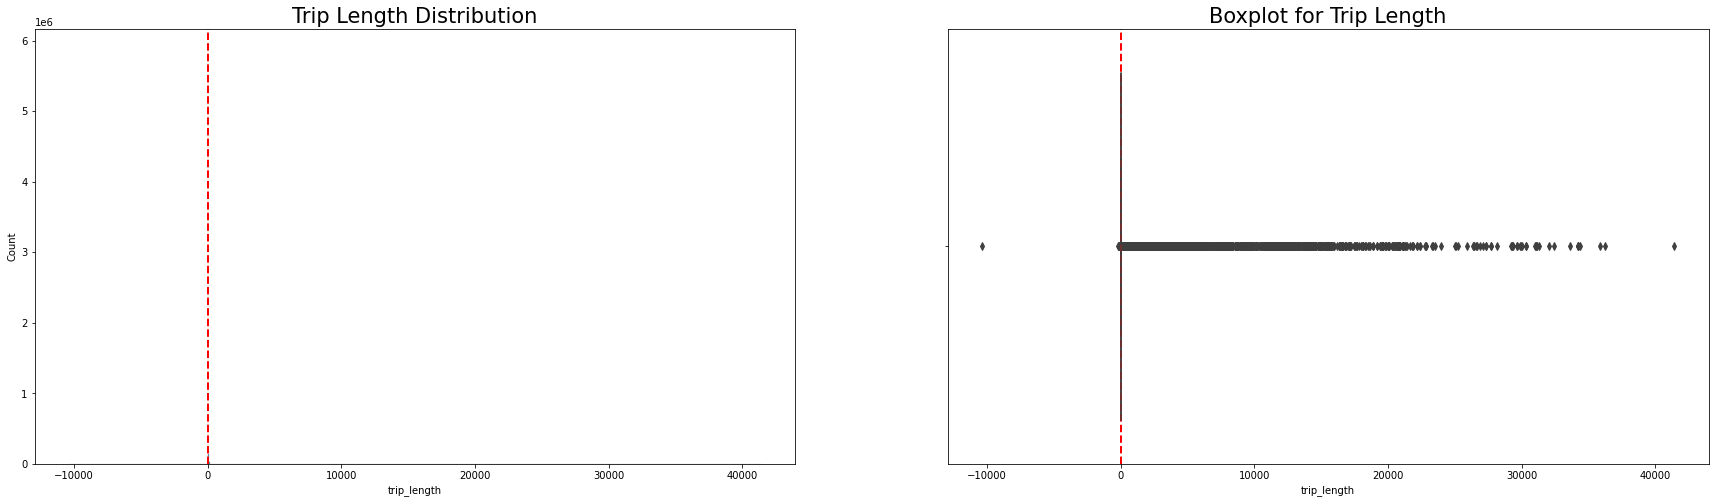

In [217]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Plot Histogram for Trip Length Distribution
sns.histplot(base2['trip_length'], bins=800, ax=ax[0])
ax[0].axvline(x=base2['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Trip Length Distribution', fontsize=21)

# Plot Boxplot for Trip Length 
sns.boxplot(base2['trip_length'], ax=ax[1])
ax[1].axvline(x=base2['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Boxplot for Trip Length', fontsize=21)

plt.show()

Most trips are within 15 minutes. But, its almost impossible to see them clearly,  as we have a huge amplitude of outliers distributed . 

The boxplot graph, on the right, is a graph that represents the distribution of trip length data. But we can't even see the box because the plot is too poluted. 

Let's understand better and excluse these outliers in order to keep a more representative dataset to work with

In [218]:
display(base2['trip_length'].max())
display(base2['trip_length'].min())

41387.25

-10353.35

In [219]:
#how many SHORT rides we have on this dataframe?
outliers_short = base2[base2['trip_length'] <= 2]

#how many LONG rides we have on this dataframe?
outliers_long = base2[base2['trip_length'] > 30]

# Adding up in one sentence
print(''' The total amount of outliers is  
        rides shorter than 2 minutes = ''', len(outliers_short), "rides.")

print("        rides longer than 30 minutes = ",  len(outliers_long), "rides.")


print("        Outliers Add up to =", (len(outliers_short)+len(outliers_long)), "rides.")

print("which is about {:.1f}% of the total number of the total".format(
    100*(len(outliers_short)+
     len(outliers_long))/
     (len(base2['trip_length']))), (len(base2['trip_length'])), "rides on the dataset")

 The total amount of outliers is  
        rides shorter than 2 minutes =  247436 rides.
        rides longer than 30 minutes =  655562 rides.
        Outliers Add up to = 902998 rides.
which is about 14.9% of the total number of the total 6048463 rides on the dataset


In [220]:
# excluding rows where "trip_length" is shorter than 2 minutes and longer than 30 minutes
base2 = base2.reset_index(drop=True)
base2['trip_length'] = base2['trip_length'][(base2['trip_length'] >= 2) & (base2['trip_length'] < 30)]
display((base2).sort_values(by='trip_length', ascending=True))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length
5207728,332C252D293714B7,electric_bike,2022-11-11 21:25:48,2022-11-11 21:27:48,Calumet Ave & 33rd St,13217,State St & 33rd St,13216,41.834795,-87.617877,41.834734,-87.625813,member,2.0
1105948,944815B1044DCE37,electric_bike,2022-05-12 12:57:33,2022-05-12 12:59:33,University Ave & 57th St,KA1503000071,NaN,NaN,41.791565,-87.599808,41.790000,-87.600000,member,2.0
2065431,F35C61128EC13E1E,electric_bike,2022-06-01 19:27:33,2022-06-01 19:29:33,Logan Blvd & Elston Ave,TA1308000031,NaN,NaN,41.929454,-87.684173,41.930000,-87.690000,member,2.0
5856327,5B20DDAB4FB8EC1A,classic_bike,2023-01-22 21:21:08,2023-01-22 21:23:08,University Ave & 57th St,KA1503000071,Ellis Ave & 55th St,KA1504000076,41.791478,-87.599861,41.794301,-87.601450,member,2.0
2391663,93A54BCF98745A89,electric_bike,2022-07-27 16:51:20,2022-07-27 16:53:20,Central Park Ave & Ohio St,369,Central Park Ave & Ohio St,369,41.890000,-87.720000,41.890000,-87.720000,member,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048299,787193CF7A25AB97,electric_bike,2023-02-08 14:01:02,2023-02-08 14:44:46,Ashland Ave & Division St,13061,Leavitt St & Armitage Ave,TA1309000029,41.903420,-87.667938,41.917805,-87.682437,casual,NaN
6048311,B85AACB2EDF62282,docked_bike,2023-02-15 11:31:13,2023-02-15 13:21:28,Clinton St & Lake St,13021,Dearborn St & Monroe St,TA1305000006,41.885637,-87.641823,41.881320,-87.629521,casual,NaN
6048318,A3B49472AFBCD838,classic_bike,2023-02-15 07:54:52,2023-02-15 08:25:50,Clark St & Wrightwood Ave,TA1305000014,Dearborn St & Monroe St,TA1305000006,41.929546,-87.643118,41.881320,-87.629521,member,NaN
6048323,116CAFFB50FCADCC,classic_bike,2023-02-18 10:40:09,2023-02-18 11:37:57,Calumet Ave & 21st St,15546,Michigan Ave & Washington St,13001,41.854184,-87.619154,41.883984,-87.624684,member,NaN


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


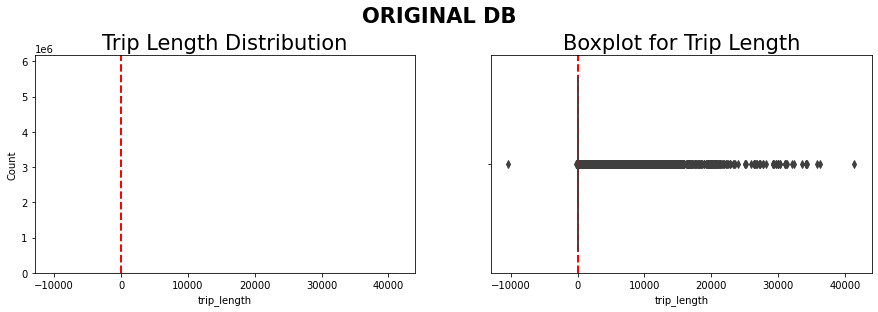

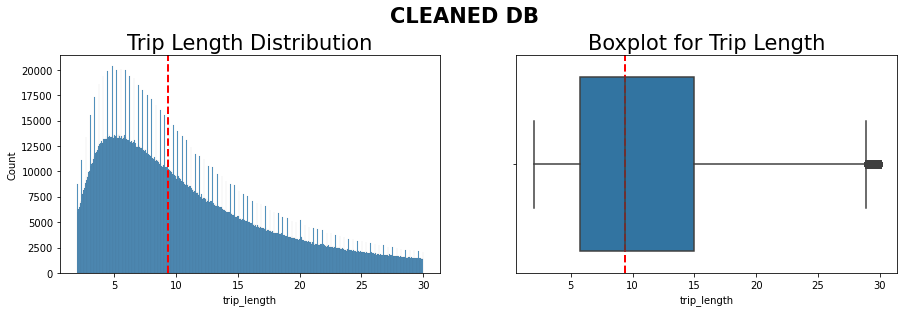

In [221]:
# Checking
# Comparing plots before and after the cleaning proccess

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.suptitle('ORIGINAL DB', fontsize=21, fontweight='bold', y=1.05)

# Plot Original Database  Histogram for Trip Length Distribution
sns.histplot(base1['trip_length'], bins=800, ax=ax[0])
ax[0].axvline(x=base1['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Trip Length Distribution', fontsize=21)

# Plot Original Database  Boxplot for Trip Length 
sns.boxplot(data=base1, x='trip_length', ax=ax[1])
ax[1].axvline(x=base1['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Boxplot for Trip Length', fontsize=21)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.suptitle('CLEANED DB', fontsize=21, fontweight='bold', y=1.05)

# Plot Cleaned Database Histogram for Trip Length Distribution
sns.histplot(base2['trip_length'], bins=800, ax=ax[0])
ax[0].axvline(x=base2['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Trip Length Distribution', fontsize=21)

# Plot Cleaned Boxplot for Trip Length 
sns.boxplot(base2['trip_length'], ax=ax[1])
ax[1].axvline(x=base2['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Boxplot for Trip Length', fontsize=21)


plt.show()

The Trip Length boxplot on  the right, is a graph that represents the distribution data of Trip Length for all rides on the dataset. 

The box represents the values between the first and third quartiles, that is, where 50% of the data are concentrated (in this case, **50% of rides have an duration between 6 and 15 minutes**).

The dashed red line that divides the box in half represents **the median, that is, the value that is in the center of the data distribution (9 minutes)** . The rods represent the minimum and maximum values of the distribution, with the points outside the rods being considered extreme values. 

Even after cleaning, we can see points outside the rods, closer to 30 minutes.. but we will keep them like that, once we have already excluded a fair amount of data.

2) Correct empty values at columns 'end_station_name', 'end_station_id', 'end_lat', 'end_lng'

In [222]:
base1.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    885258
start_station_id      885390
end_station_name      947320
end_station_id        947461
start_lat                  0
start_lng                  0
end_lat                 6101
end_lng                 6101
member_casual              0
trip_length                0
dtype: int64

In [223]:
#excluding the empty values 
base2 = base2.dropna(axis=0)

# checking
base2.isna().sum()


ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
trip_length           0
dtype: int64

In [224]:
#excluding the empty column on "stations"
stations1 = stations.dropna()

Now that we concluded the cleaning proccess and have a reliable, comprehensive and dataset we are ready to go on within our analysis

### **Data Analysis**

Before going on with the analysis, let's frame them through the guiding questions, that serve as main objective for this study. 

**1. How do annual members and casual riders use Divvy bikes differently?**

**2. Why would casual riders buy Divvy annual memberships?**

**3. How can Divvy use digital media to influence casual riders to become members?**

Let's take a look on each group info. How large is each group. Once we don't have the number of riders / customers, we will base our analysis on the number of rides 

In [225]:
membership = base2['member_casual'].value_counts()
print (membership)

member    2558214
casual    1408878
Name: member_casual, dtype: int64


In [226]:
membership = base2['member_casual'].value_counts()
print (membership/len(base2))

member    0.644859
casual    0.355141
Name: member_casual, dtype: float64


 Members are responsible for the majority of the Divvy rides, with 61% of total rides on the analysed timeframe.
 
 
 Now, we will take a look on how long is an average ride. 
 We have already seen that an average ride length is around 9 mins, but  **Is there significative differences on trip duration for both groups?**

In [232]:
print("The median for the dataset as a whole is ",base2['trip_length'].median())
trip_length_median = base2.groupby('member_casual')['trip_length'].median()
print("Below, the median for each rider segment in ",trip_length_median)


The median for the dataset as a whole is  9.5
Below, the median for each rider segment in  member_casual
casual    11.283333
member     8.616667
Name: trip_length, dtype: float64


It seems that Casual members take longer trips. Lets try to Making it more visual:

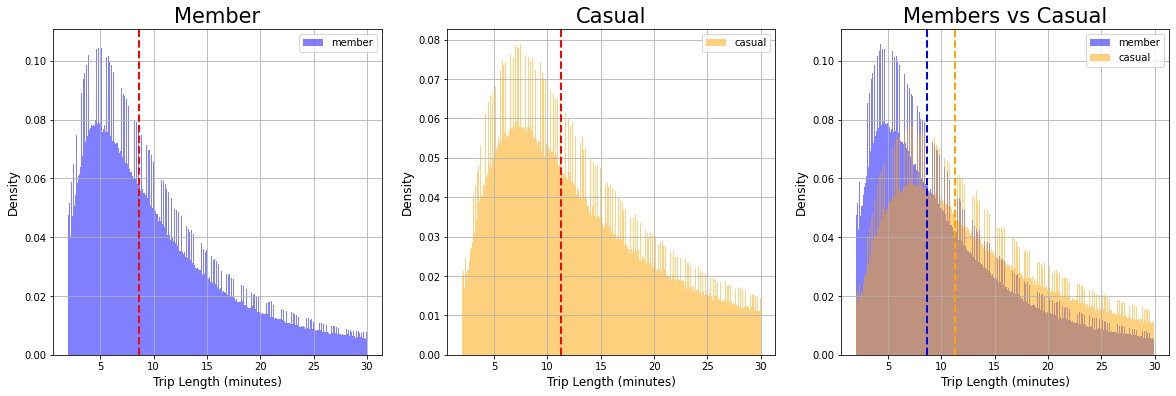

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot Trip Length Distribution for Member
base2[base2['member_casual']=='member']['trip_length'].hist(ax=ax[0], bins=500, alpha=0.5, density=True, color='blue', label='member')
ax[0].axvline(x=base2[base2['member_casual']=='member']['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Member', fontsize=21)

# Plot Trip Length Distribution for Casual
base2[base2['member_casual']=='casual']['trip_length'].hist(ax=ax[1], bins=500, alpha=0.5, density=True, color='orange', label='casual')
ax[1].axvline(x=base2[base2['member_casual']=='casual']['trip_length'].median(), color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Casual', fontsize=21)

# Plot Trip Length Distribution for Both
base2[base2['member_casual']=='member']['trip_length'].hist(ax=ax[2], bins=500, alpha=0.5, density=True, color='blue', label='member')
base2[base2['member_casual']=='casual']['trip_length'].hist(ax=ax[2], bins=500, alpha=0.5, density=True, color='orange', label='casual')
ax[2].axvline(x=base2[base2['member_casual']=='member']['trip_length'].median(), color='blue', linestyle='dashed', linewidth=2)
ax[2].axvline(x=base2[base2['member_casual']=='casual']['trip_length'].median(), color='orange', linestyle='dashed', linewidth=2)
ax[2].set_title('Members vs Casual', fontsize=21)

# Set common title and axis labels
#fig.suptitle('Distribution of Trip Length by User Type', fontsize=16)
for i in range(3):
    ax[i].set_xlabel('Trip Length (minutes)', fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].tick_params(axis='both', labelsize=10)
    ax[i].legend()

plt.show()

**Note**: 
For this dataset, I decided to work with the median  instad of the mean.

Altought both are different measures of central tendency. The mean is sensitive to extreme values or outliers, that is what we have been dealing in this dataset. 

The median, on the other hand, is the middle value of the dataset. It separates the dataset into two halves of equal size. The median is a more robust measure of central tendency, as it is not affected by extreme values or outliers.





We can see that Lets take a look on the preferred day to ride the Divvy bikes by each custommer segment.

In [229]:
base2['weekday'] = base2['started_at'].dt.strftime('%A')
print(base2.groupby('member_casual')['weekday'].value_counts())

member_casual  weekday  
casual         Saturday     275734
               Sunday       228558
               Friday       203109
               Thursday     192187
               Wednesday    173382
               Monday       168167
               Tuesday      167741
member         Tuesday      416668
               Wednesday    408739
               Thursday     405883
               Monday       372235
               Friday       351348
               Saturday     318349
               Sunday       284992
Name: weekday, dtype: int64


It seems that while Casual users mostly use the bikes on weekends. (top of the ride count list above. Members have the weekdays as their preferred days to ride Divvy bikes. Lets plot this to make it clearer.

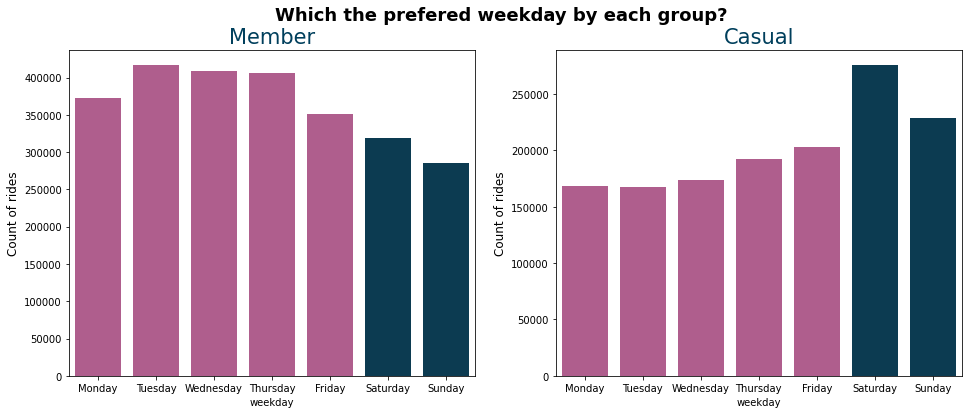

In [233]:
# Weekdays Preferences 

# define the color palette and order
colors = ['#bc5090', '#bc5090','#bc5090','#bc5090','#bc5090', '#003f5c', '#003f5c']
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

fig.suptitle('Which the prefered weekday by each group?', fontsize=18, weight = 'bold', color = 'black')

weekday_member = base2[base2['member_casual']=='member']
sns.countplot(x='weekday', data=weekday_member, ax=ax[0], palette=colors, order=order)
ax[0].set_title('Member', fontsize=21, color= '#003f5c')
ax[0].set_ylabel('Count of rides', fontsize=12)


weekday_casual = base2[base2['member_casual']=='casual']
sns.countplot(x='weekday', data=weekday_casual, ax=ax[1], palette=colors, order=order)
ax[1].set_title('Casual', fontsize=21, color= '#003f5c')
ax[1].set_ylabel('Count of rides', fontsize=12)


plt.show()


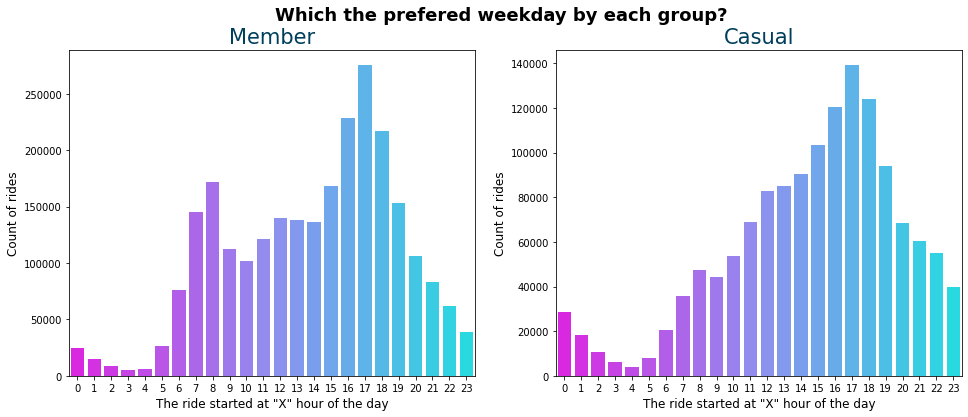

In [234]:
# Hours of Starting a ride
base2['start_at_h'] = base2['started_at'].dt.hour

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

fig.suptitle('Which the prefered weekday by each group?', fontsize=18, weight = 'bold', color = 'black')

start_at_h_member = base2[base2['member_casual']=='member']
sns.countplot(x='start_at_h', data=start_at_h_member, ax=ax[0], palette='cool_r')
ax[0].set_title('Member', fontsize=21, color= '#003f5c')
ax[0].set_xlabel('The ride started at "X" hour of the day', fontsize=12)
ax[0].set_ylabel('Count of rides', fontsize=12)


start_at_h_casual = base2[base2['member_casual']=='casual']
sns.countplot(x='start_at_h', data=start_at_h_casual, ax=ax[1], palette='cool_r')
ax[1].set_title('Casual', fontsize=21, color= '#003f5c')
ax[1].set_xlabel('The ride started at "X" hour of the day', fontsize=12)
ax[1].set_ylabel('Count of rides', fontsize=12)


plt.show()

## **Answer for the Custommer Guiding Questions and Overall Recomendations**


### **How do annual members and casual riders use bikes differently?**

*Members*
 - Use the service mostly **to commute to work, on short trips during weekdays and rush hours**

*Casual*
 - Use the service, probrably **for fun and leisure, during weekends afternoons**. They like to ride **slightly longer rides**
 
### **Why would casual riders buy annual memberships?

Casual users that like the service and enjoy it during weekends leisure time with family, may be willing to subscribe for an annual membership in order to try to sustain a healthier lifestyle, even during workdays, when commuting to work. 

Should them be presented with a good strategy to help achieving a healthier life, those who are already aiming it may find the support of a service they already use for leisure a good starting point.


### **How can use digital media to influence casual riders to become members?

Divvy can run social media ads campaings promoting the beneffits of exercizing regularly (at least 3x per week), and counting stories of real members that are enjoying a healthier life commuting to work on the bike share service on a regular basis.

Besides social media, I would also use e-mail Marketing and even leaflets to be delivered on the bike stations, exclusivelly during the weekend for the Casual Riders.

I would also launch a huge campaign with a ** Divvy Challenge** deffiying casual users to, at least once a week, commute to work using Divvy Bikes.

For those who complete the chalenge during a given month, I would offer a two month free membership, in order to incentivate the creation of the good habit. 

At the end of this free period, chances are those who managed to create the habit, would become paying members.




In [ ]:
base2.to_csv("/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/Divvy_Data.csv", encoding='utf-8')

In [ ]:
from google.colab import files
files.download ("/content/drive/MyDrive/Profissional/DataSci/Projetos/Divvy_Bikes/Divvy_Data.csv")

# General notes on this project

VER ESTES PROJETOS NO GIT.. 
sobre este mesmo tema.
 * https://github.com/RMpolski/Divvy-Rideshare-Analysis
 * https://github.com/mattshax/divvyvision
 * https://github.com/JifuZhao/Chicago-Divvy/blob/master/Chicago%20Divvy%20Data%20Visualization%20and%20Analysis.ipynb
 * https://github.com/ruthhinkle/divvy-analysis/blob/main/Divvy'ing_Up_Data_Final_Notebook.ipynb
 
 
 
 No futuro, se der, entrar em contato com o pessoal da itau Bikes, ver se eles tem dados e se topam compartilhar. pra gente fazer algo parecido.
 
 https://bikeitau.com.br/
 

## Anotação Marcio

Copy of [CASE SUMMARY](https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1678579200&Signature=PeaNvSQARlrCNuHzW8bP6QjqLHfNDdm7QSI4DAhi-nbo642pQOT1K9RKzrscrIE9rMEScLz3C~qOjvTmL7ThXJnV60jNKvV9yjAKAD3B6Zir7u~WSI6Z18eEUEXHbw8RGAPBcOnSGnes51M4x1PshYp4BRJUCgwp9G51zLveFPo_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

Os dados cobrem desde 2013 até hoje.. 10 anos de informação.
os arquivos Divvy_Trips_YYY QQ cobrem dados anteriores a 2020.
Se eu puxar tudo. vai travar o Note..
então vou começar só com o que o projeto pede. últimos 12 meses.. e. lá na frente. incremento um histórico maior. pra exercitar se for o caso